In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
path = "dataset/winequality-white.csv"
data = pd.read_csv(path, delimiter=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
# renaming data
new_names = {
    'fixed acidity':'fixed_acidity', 
    'volatile acidity':'volatile_acidity',
    'citric acid':'citric_acid',
    'residual sugar':'residual_sugar',
    'free sulfur dioxide':'free_sulfur_dioxide',
    'total sulfur dioxide':'total_sulfur_dioxide'
}

data.rename(columns=new_names, inplace=True)
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
# number of duplicated values in the data
for feat in data:
    print(f"{feat}: {data[feat].duplicated().sum()}")

fixed_acidity: 4830
volatile_acidity: 4773
citric_acid: 4811
residual_sugar: 4588
chlorides: 4738
free_sulfur_dioxide: 4766
total_sulfur_dioxide: 4647
density: 4008
pH: 4795
sulphates: 4819
alcohol: 4795
quality: 4891


<p>There are a lot of duplicated values in each feature, but that doesn't imply the duplicates have the same values for other features<p/>

In [8]:
data['fixed_acidity'].duplicated().value_counts()

True     4830
False      68
Name: fixed_acidity, dtype: int64

<p>There are 68 unique values for the 'fixed_acdity' feature </p>

In [9]:
# unique values in 'fixed_acidity'
data.loc[data['fixed_acidity'].duplicated() == False]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
2945,4.9,0.330,0.31,1.2,0.016,39.0,150.0,0.98713,3.33,0.59,14.0,8
3710,4.7,0.670,0.09,1.0,0.020,5.0,9.0,0.98722,3.30,0.34,13.6,5
4259,3.8,0.310,0.02,11.1,0.036,20.0,114.0,0.99248,3.75,0.44,12.4,6
4446,4.4,0.460,0.10,2.8,0.024,31.0,111.0,0.98816,3.48,0.34,13.1,6


<b><p>Duplicated rows in the dataset<p/><b/>

In [10]:
data.loc[data.duplicated() == True].count()

fixed_acidity           937
volatile_acidity        937
citric_acid             937
residual_sugar          937
chlorides               937
free_sulfur_dioxide     937
total_sulfur_dioxide    937
density                 937
pH                      937
sulphates               937
alcohol                 937
quality                 937
dtype: int64

In [11]:
data.loc[data.duplicated()]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
20,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.800000,8
...,...,...,...,...,...,...,...,...,...,...,...,...
4828,6.4,0.23,0.35,10.3,0.042,54.0,140.0,0.99670,3.23,0.47,9.200000,5
4850,7.0,0.36,0.35,2.5,0.048,67.0,161.0,0.99146,3.05,0.56,11.100000,6
4851,6.4,0.33,0.44,8.9,0.055,52.0,164.0,0.99488,3.10,0.48,9.600000,5
4856,7.1,0.23,0.39,13.7,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6


In [12]:
data.drop_duplicates(inplace=True, ignore_index=True)
data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
3956,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
3957,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
3958,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
3959,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [13]:
data.duplicated().sum()

0

## Exploratory Data Analysis

In [14]:
#correlation
corr = data.corr()
corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.019214,0.298959,0.083620,0.024036,-0.058396,0.082425,0.266091,-0.431274,-0.017453,-0.110788,-0.124636
volatile_acidity,-0.019214,1.000000,-0.163228,0.098340,0.086287,-0.102471,0.102315,0.060603,-0.046954,-0.021150,0.046815,-0.190678
citric_acid,0.298959,-0.163228,1.000000,0.106269,0.132590,0.091681,0.122845,0.160076,-0.183015,0.049442,-0.076514,0.007065
residual_sugar,0.083620,0.098340,0.106269,1.000000,0.076091,0.306835,0.409583,0.820498,-0.165997,-0.020503,-0.398167,-0.117339
chlorides,0.024036,0.086287,0.132590,0.076091,1.000000,0.101272,0.191145,0.253088,-0.090573,0.017871,-0.356928,-0.217739
free_sulfur_dioxide,-0.058396,-0.102471,0.091681,0.306835,0.101272,1.000000,0.619437,0.294638,-0.007750,0.037932,-0.251768,0.010507
total_sulfur_dioxide,0.082425,0.102315,0.122845,0.409583,0.191145,0.619437,1.000000,0.536868,0.008239,0.136544,-0.446643,-0.183356
density,0.266091,0.060603,0.160076,0.820498,0.253088,0.294638,0.536868,1.000000,-0.063734,0.082048,-0.760162,-0.337805
pH,-0.431274,-0.046954,-0.183015,-0.165997,-0.090573,-0.007750,0.008239,-0.063734,1.000000,0.142353,0.093095,0.123829
sulphates,-0.017453,-0.021150,0.049442,-0.020503,0.017871,0.037932,0.136544,0.082048,0.142353,1.000000,-0.022850,0.053200


Text(0.5, 1.0, 'Feature Correlation')

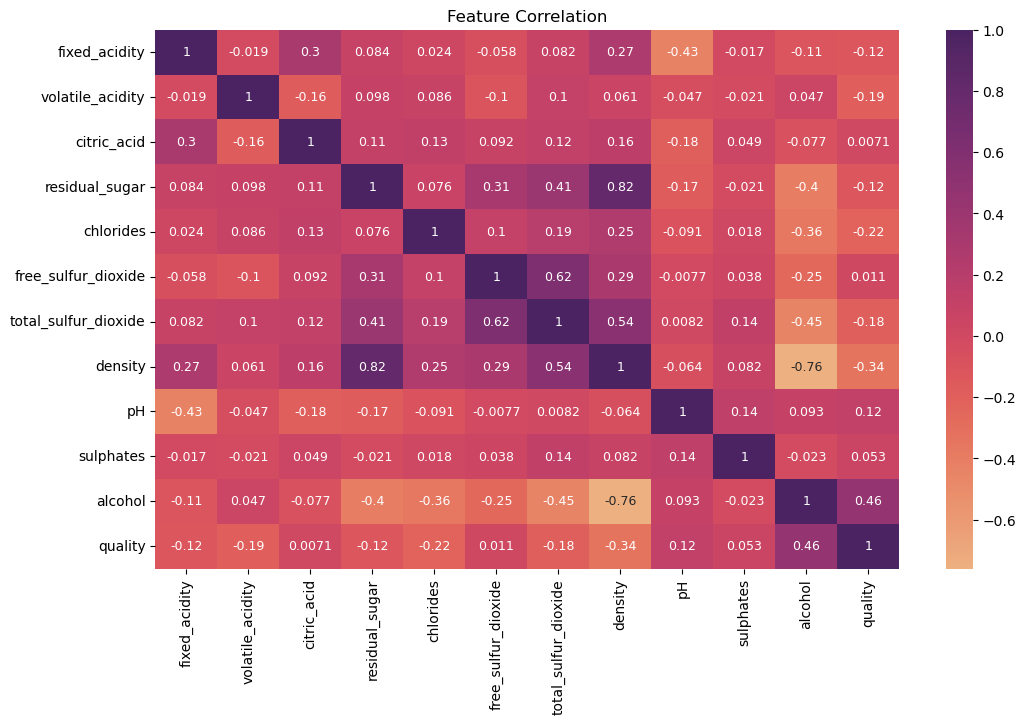

In [15]:
plt.figure(figsize=(12,7))
sns.heatmap(corr, annot=True, annot_kws={'size':9}, cmap='flare')
plt.title("Feature Correlation")

<AxesSubplot:>

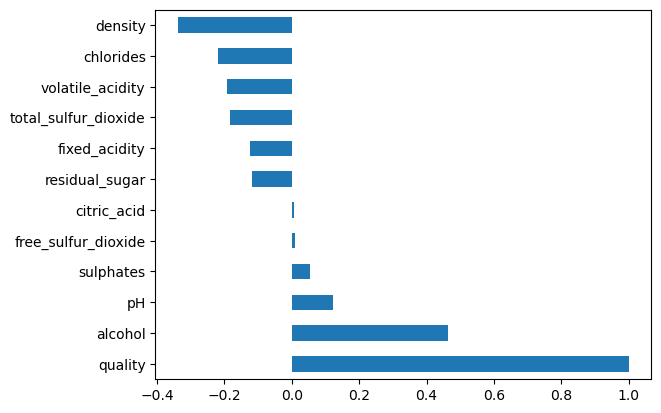

In [16]:
# important features
important_feat = corr['quality']
important_feat.sort_values(ascending=False).plot(kind='barh')

In [17]:
test_data = data.copy()
test_data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
3956,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
3957,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
3958,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
3959,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [18]:
test_data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [19]:
new_feats = test_data.drop(columns=['density','chlorides', 'volatile_acidity', 'total_sulfur_dioxide','fixed_acidity', 'residual_sugar'],axis=1)

In [20]:
new_feats_corr = new_feats.corr()

<AxesSubplot:>

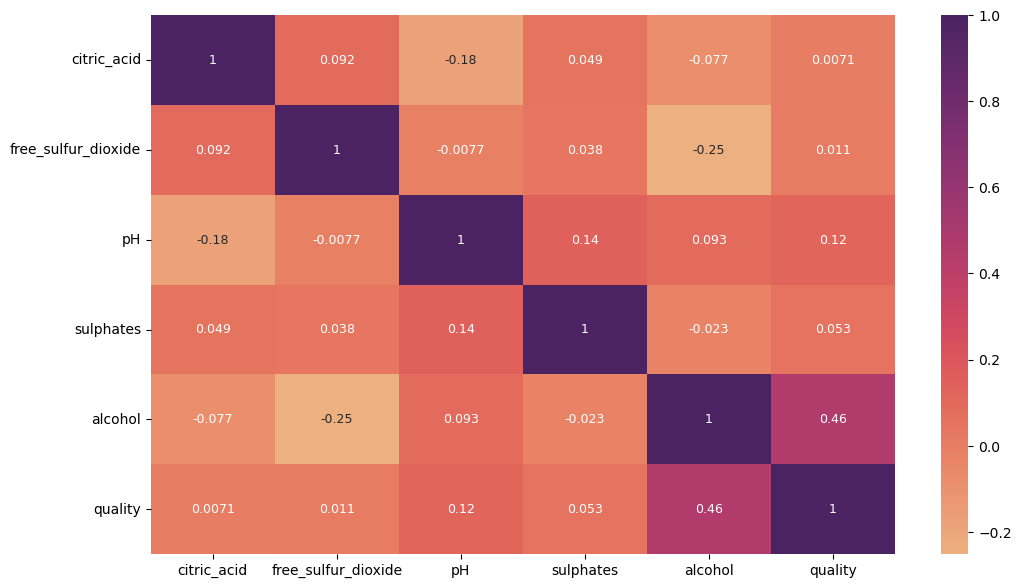

In [21]:
plt.figure(figsize=(12, 7))
sns.heatmap(new_feats_corr, annot=True, annot_kws={'size':9}, cmap='flare')

In [22]:
y = new_feats['quality']
X = new_feats.drop(columns=['quality'])

In [ ]:
# xgboost 

## Feature Scaling

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
norm_data = MinMaxScaler()
X = norm_data.fit_transform(X)

## Data Spliting

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_tmp, X_test, y_tmp, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)
X_train, X_dev, y_train, y_dev = train_test_split(X_tmp, y_tmp, test_size=0.2/0.8, stratify=y_tmp, random_state=42)

In [27]:
sets = [X_train, y_train, X_dev, y_dev, X_test, y_test]
set_labels = ["X_train", "y_train", "X_dev", "y_dev", "X_test", "y_test"]
for i,set in enumerate(sets):
    set_name = set_labels[i]
    print(f"Shape for {set_name} is {set.shape}")

Shape for X_train is (2376, 5)
Shape for y_train is (2376,)
Shape for X_dev is (792, 5)
Shape for y_dev is (792,)
Shape for X_test is (793, 5)
Shape for y_test is (793,)


In [43]:
y_train_xg = y_train - 3
y_dev_xg = y_dev - 3
y_test_xg = y_test - 3

## Model Training

In [385]:
# decision trees
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=6)

In [386]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [387]:
y_pred = clf.predict(X_train)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)

0.0

In [389]:
# dev set
y_dev_pred = clf.predict(X_dev)

In [390]:
accuracy_score(y_dev, y_dev_pred)

0.5113636363636364

In [403]:
# support vector classifier
from sklearn.svm import SVC
svc_clf = SVC(C=2, kernel='linear')

In [404]:
svc_clf.fit(X_train, y_train)

SVC(C=2, kernel='linear')

In [405]:
y_pred = svc_clf.predict(X_train)

In [406]:
accuracy_score(y_train, y_pred)

0.5143097643097643

In [29]:
# xgboost
import xgboost as xgb


In [98]:
model = xgb.XGBClassifier(objective='multi:softmax', num_class=7, learning_rate=0.01)

In [99]:
model.fit(X_train, y_train_xg)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=7,
              num_parallel_tree=None, ...)

In [100]:
y_pred = model.predict(X_train)

In [101]:
y_pred

array([5, 3, 3, ..., 2, 3, 2])

In [102]:
y_train_xg

2410    5
3367    3
2220    3
928     3
2537    4
       ..
2635    3
569     2
719     4
122     3
1674    2
Name: quality, Length: 2376, dtype: int64

In [103]:
y.unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [104]:
accuracy_score(y_train_xg, y_pred)

0.6342592592592593

In [105]:
y_pred_dev = model.predict(X_dev)

In [106]:
accuracy_score(y_dev_xg, y_pred_dev)

0.523989898989899